In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *


In [2]:
temp = pd.read_csv('/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp.csv')

In [3]:
temp.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
temp.rename(columns={'date': 'Date'}, inplace=True)

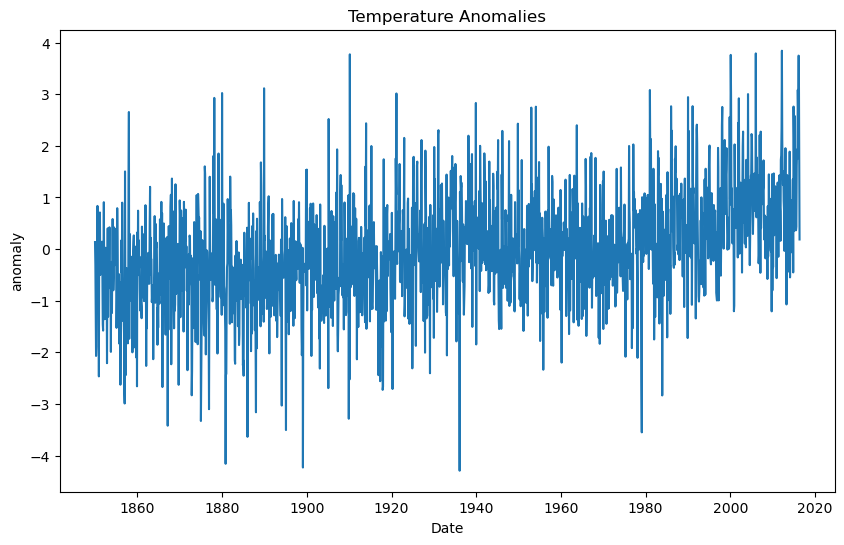

In [32]:
# plot anamolies
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)

# filter out dates from 1973
#temp = temp[temp.index.year >= 1973]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='anomaly', data=temp)
plt.title('Temperature Anomalies')
plt.show()

In [33]:
# next steps: use moving av erage to smooth out temperature, find other things this could be correlated with other things, 
# smooth both consumption and anomaly over the long term

The p-value for the F-test is: 1.2164644527010875e-07.
The model is statistically significant.


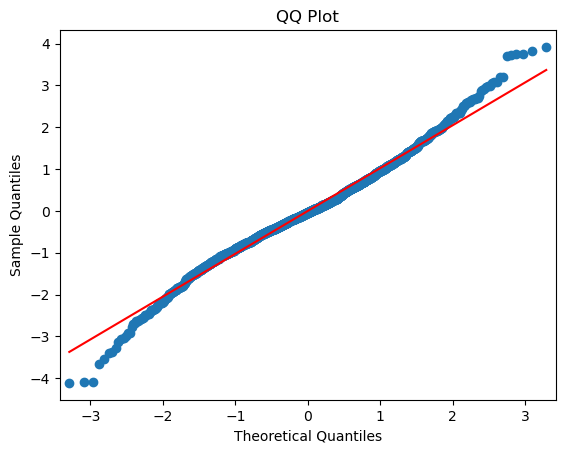

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 114.81863593978355, 'Chi^2 two-tail prob.': 1.1680192377647257e-25, 'Skew': 0.09179035010013636, 'Kurtosis': 4.160254971115663}


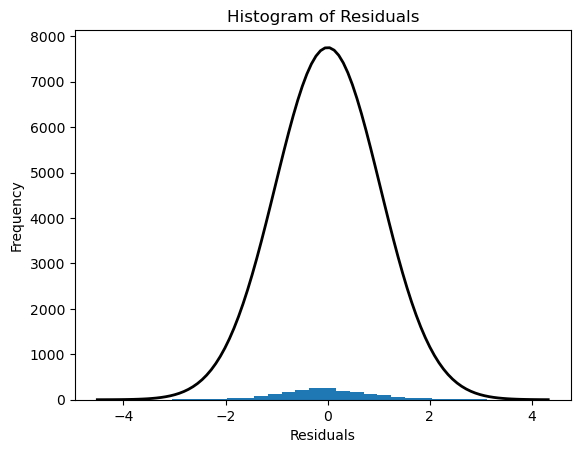

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 0.8726154767583251, 'p-value': 0.35023225036899175, 'f-value': 0.8721226358751459, 'f p-value': 0.3504813561109269}


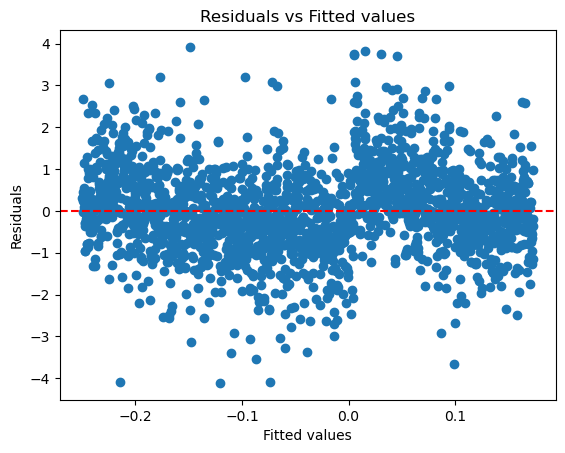

The residuals are homoscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 1.3640949284432664, 'p-value': 0.1725376907510201}


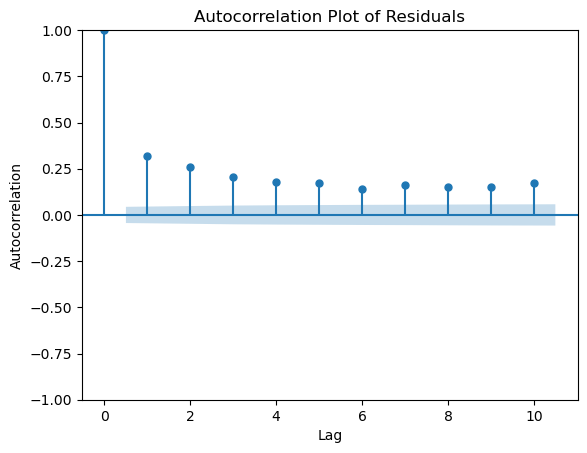

The residuals are not autocorrelated.


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [5]:
temp['anomaly_squared'] = temp['anomaly'] ** 2

# linear regression
X = temp.index.values.astype(float).reshape(-1, 1)
y = temp['anomaly'].values

test_linear_model(X, y)

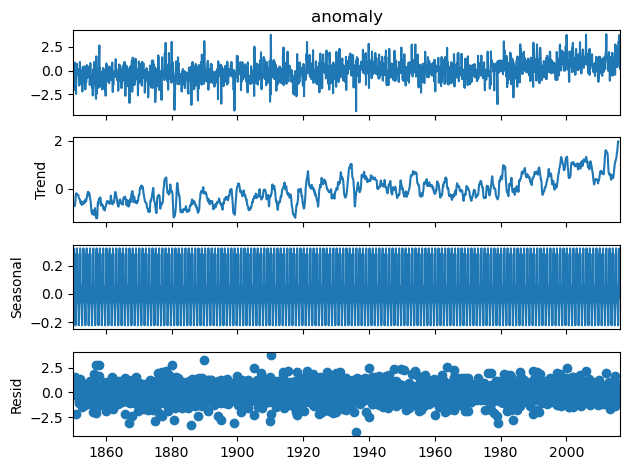

In [35]:
# seasonal decomposition for temperature
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(temp['anomaly'], model='additive', period=12)
decomposition.plot()
plt.show()

trend = decomposition.trend

In [36]:
temp_trend = pd.DataFrame(trend)

KeyError: 'anomaly'

In [ ]:
# ALLOW MORE DATES ON EMICOM (AHEAD) AND MORE DATES ON TEMP (BEHIND) 
# ADD THE ML MODEL THAT TESTS FOR WHICH LAG IS THE MOST EFFECTIVE 


In [38]:
# make date a column
temp_trend.reset_index(inplace=True)
temp_trend.rename(columns={'trend': 'anomaly'}, inplace=True)
temp_trend.dropna(inplace=True)

The p-value for the F-test is: 0.0.
The model is statistically significant.


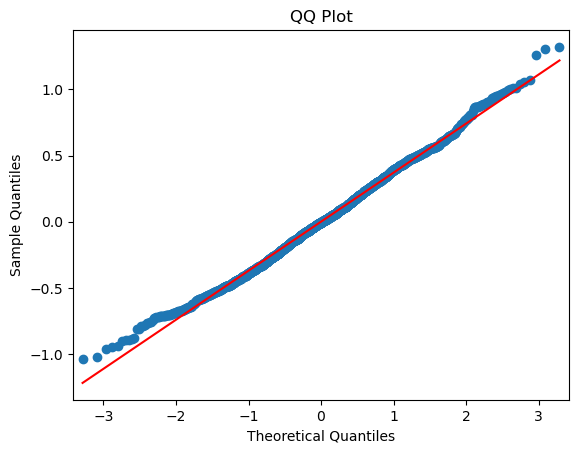

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 13.297925779313974, 'Chi^2 two-tail prob.': 0.0012953648453398658, 'Skew': 0.175957179775581, 'Kurtosis': 2.8078093390849266}


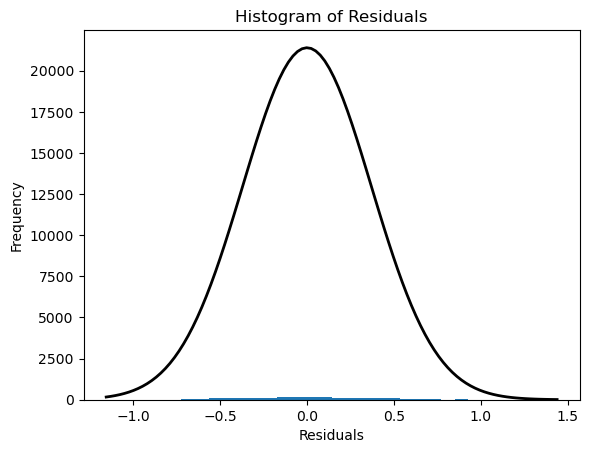

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 47.8685775137674, 'p-value': 4.557679391738185e-12, 'f-value': 49.002038843585716, 'f p-value': 3.4859655258819387e-12}


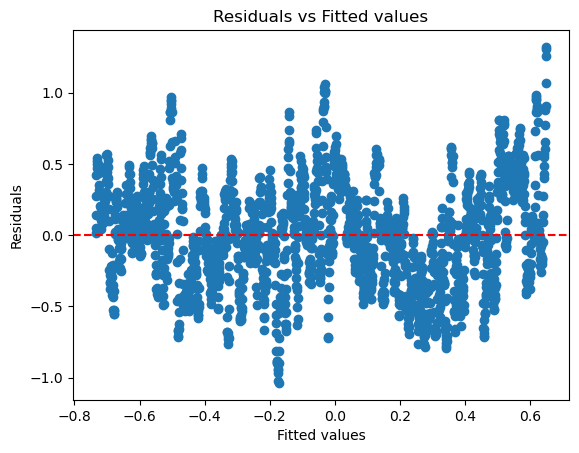

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 0.046697643458401765, 'p-value': 0.9627542085464538}


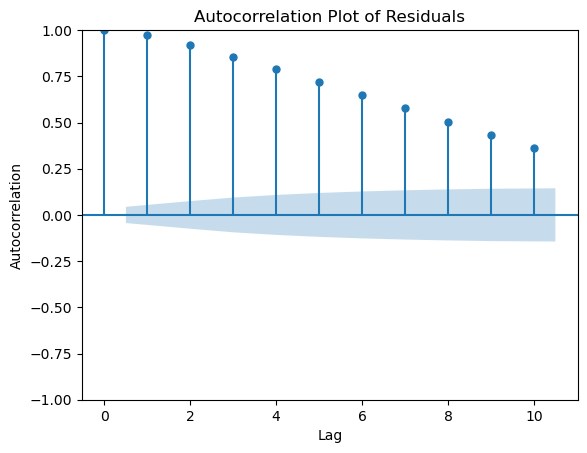

The residuals are not autocorrelated.


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [39]:
X = temp_trend.index.values.astype(float).reshape(-1, 1)
y = temp_trend['anomaly'].values
test_linear_model(X, y)

In [6]:
temp

,anomaly,Date,anomaly_squared
0,1.142,1950-01-01,1.304164
1,-0.015,1950-02-01,0.000225
2,-0.180,1950-03-01,0.032400
3,-0.973,1950-04-01,0.946729
4,-0.467,1950-05-01,0.218089
...,...,...,...
1992,-0.019,1949-08-01,0.000361
1993,-0.278,1949-09-01,0.077284
1994,0.212,1949-10-01,0.044944
1995,2.429,1949-11-01,5.900041


In [7]:
temp.to_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp_trend.csv")

In [43]:
emi_com = pd.read_csv('/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv')
emi_com.head()
emi_com['Date'] = pd.to_datetime(emi_com['Date'])

In [44]:
# inner join temp and emi_com on date
df = pd.merge(temp_trend, emi_com, on='Date', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19031 entries, 0 to 19030
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           19031 non-null  datetime64[ns]
 1   anomaly                        19031 non-null  float64       
 2   Unnamed: 0                     19031 non-null  int64         
 3   Consumption (quadrillion Btu)  19031 non-null  float64       
 4   Energy Type                    19031 non-null  object        
 5   Energy Class                   19031 non-null  object        
 6   Sector                         19031 non-null  object        
 7   Emission (Mton Co2)            19031 non-null  float64       
 8   Emission per Consumption       18501 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 1.3+ MB


In [45]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,15083,1973-01-01,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,13861,1973-01-01,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
22579,9583,2023-11-01,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
22580,10194,2023-11-01,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
22581,11416,2023-11-01,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


In [47]:
emi_com = emi_com[["Date","Consumption (quadrillion Btu)", "Energy Class", "Sector", "Emission (Mton Co2)"]] 

In [48]:
emi_com

,Date,Consumption (quadrillion Btu),Energy Class,Sector,Emission (Mton Co2)
0,1973-01-01,0.586164,Petroleum,Residential,22.796
1,1973-01-01,0.002308,Petroleum,Electric Power,0.128
2,1973-01-01,0.231730,Natural Gas,Electric Power,12.163
3,1973-01-01,0.062117,Petroleum,Electric Power,2.397
4,1973-01-01,2.921715,Petroleum,Transportation,101.775
...,...,...,...,...,...
22578,2023-11-01,0.049392,Petroleum,Industrial,1.426
22579,2023-11-01,0.141194,Petroleum,Industrial,7.556
22580,2023-11-01,0.006932,Petroleum,Industrial,0.278
22581,2023-11-01,1.024604,Petroleum,Transportation,37.627


In [49]:
# collapse sectors into 1 
# find emission per consumption 

emi_com = emi_com.groupby(['Date','Energy Class']).sum(['Consumption (kBarrel)', 'Emission (Mton Co2)'])


In [50]:
#emi_com['Emi/Con'] = emi_com['Emission (Mton Co2)'] / emi_com['Consumption (kBarrel)']

In [51]:
emi_com = emi_com.reset_index()

In [52]:
emi_com.index = emi_com['Date']

In [53]:
emi_com = emi_com.drop(['Date'],axis=1)

In [54]:
df = emi_com.join(temp,on='Date',how='inner')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1551 entries, 1973-01-01 to 2016-05-01
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Energy Class                   1551 non-null   object 
 1   Consumption (quadrillion Btu)  1551 non-null   float64
 2   Emission (Mton Co2)            1551 non-null   float64
 3   anomaly                        1551 non-null   float64
 4   anomaly_squared                1551 non-null   float64
dtypes: float64(4), object(1)
memory usage: 72.7+ KB


In [56]:
sns.scatterplot(y=df["Emi/Con"], x=df["anomaly"], hue=df['Energy Class'])

KeyError: 'Emi/Con'

In [57]:
df

,Energy Class,Consumption (quadrillion Btu),Emission (Mton Co2),anomaly,anomaly_squared
Date,,,,,
1973-01-01,Coal,0.842153,109.679,-0.478,0.228484
1973-01-01,Natural Gas,1.510032,121.365,-0.478,0.228484
1973-01-01,Petroleum,12.114747,461.050,-0.478,0.228484
1973-02-01,Coal,0.755559,98.847,0.118,0.013924
1973-02-01,Natural Gas,1.403320,109.954,0.118,0.013924
...,...,...,...,...,...
2016-04-01,Natural Gas,1.456463,110.012,1.889,3.568321
2016-04-01,Petroleum,12.627490,385.531,1.889,3.568321
2016-05-01,Coal,0.893623,92.015,0.186,0.034596


In [61]:
sns.heatmap(df[['Consumption (quadrillion Btu)','Emission (Mton Co2)',	'Emi/Con',	'anomaly',	'anomaly_squared']].corr())

KeyError: "['Emi/Con'] not in index"

In [62]:
df['Energy Class'].loc[df['Energy Class']== "Natural Gas"] = None
df['Energy Class'].dropna()

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_65396/4050546213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Energy Class'].loc[df['Energy Class']== "Natural Gas"] = None


Date
1973-01-01         Coal
1973-01-01    Petroleum
1973-02-01         Coal
1973-02-01    Petroleum
1973-03-01         Coal
                ...    
2016-03-01    Petroleum
2016-04-01         Coal
2016-04-01    Petroleum
2016-05-01         Coal
2016-05-01    Petroleum
Name: Energy Class, Length: 1030, dtype: object

In [63]:
df['Energy Class'].dropna()

Date
1973-01-01         Coal
1973-01-01    Petroleum
1973-02-01         Coal
1973-02-01    Petroleum
1973-03-01         Coal
                ...    
2016-03-01    Petroleum
2016-04-01         Coal
2016-04-01    Petroleum
2016-05-01         Coal
2016-05-01    Petroleum
Name: Energy Class, Length: 1030, dtype: object

In [64]:
df

,Energy Class,Consumption (quadrillion Btu),Emission (Mton Co2),anomaly,anomaly_squared
Date,,,,,
1973-01-01,Coal,0.842153,109.679,-0.478,0.228484
1973-01-01,None,1.510032,121.365,-0.478,0.228484
1973-01-01,Petroleum,12.114747,461.050,-0.478,0.228484
1973-02-01,Coal,0.755559,98.847,0.118,0.013924
1973-02-01,None,1.403320,109.954,0.118,0.013924
...,...,...,...,...,...
2016-04-01,None,1.456463,110.012,1.889,3.568321
2016-04-01,Petroleum,12.627490,385.531,1.889,3.568321
2016-05-01,Coal,0.893623,92.015,0.186,0.034596


In [65]:
sns.scatterplot(x = df['Consumption (kBarrel)'],y=df['Emission (Mton Co2)'],hue=df['Energy Class'])

KeyError: 'Consumption (kBarrel)'

In [66]:
# plot temperature vs emission by petroleum in january

petroleum = df[df['Energy Class'] == 'Petroleum']
petroleum = petroleum[petroleum['Energy Type'] == 'Total']
petroleum['Month'] = pd.DatetimeIndex(petroleum['Date']).month_name()
petroleum = petroleum[petroleum['Month'] == 'January']
petroleum['Year'] = pd.DatetimeIndex(petroleum['Date']).year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='anomaly', y='Emission (Mton Co2)', data=petroleum, hue='Year')
plt.title('Temperature vs Emission by Petroleum in January')

KeyError: 'Energy Type'

In [67]:
petroleum

,Energy Class,Consumption (quadrillion Btu),Emission (Mton Co2),anomaly,anomaly_squared
Date,,,,,
1973-01-01,Petroleum,12.114747,461.050,-0.478,0.228484
1973-02-01,Petroleum,12.382622,429.549,0.118,0.013924
1973-03-01,Petroleum,11.173558,429.514,1.554,2.414916
1973-04-01,Petroleum,10.275726,373.219,-0.845,0.714025
1973-05-01,Petroleum,10.752171,402.518,-0.403,0.162409
...,...,...,...,...,...
2016-01-01,Petroleum,12.354467,390.724,2.599,6.754801
2016-02-01,Petroleum,12.847264,382.859,3.747,14.040009
2016-03-01,Petroleum,12.923431,408.621,3.741,13.995081


In [68]:
import sys
sys.path.append('..')
from LinearModel import *

The p-value for the F-test is: 0.02678282680244274.
The model is statistically significant.


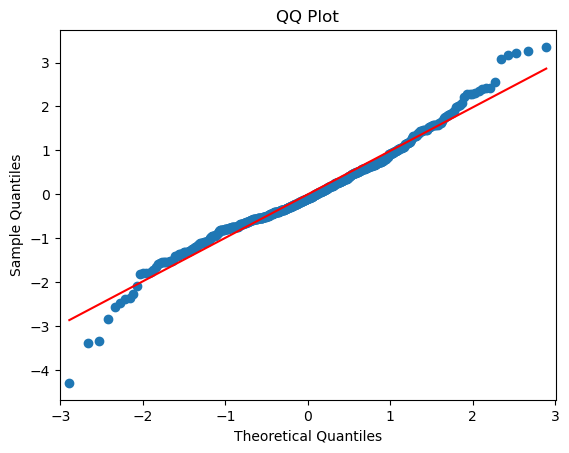

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 49.92400465351038, 'Chi^2 two-tail prob.': 1.4425807487639958e-11, 'Skew': 0.1668681348873571, 'Kurtosis': 4.479318191858415}


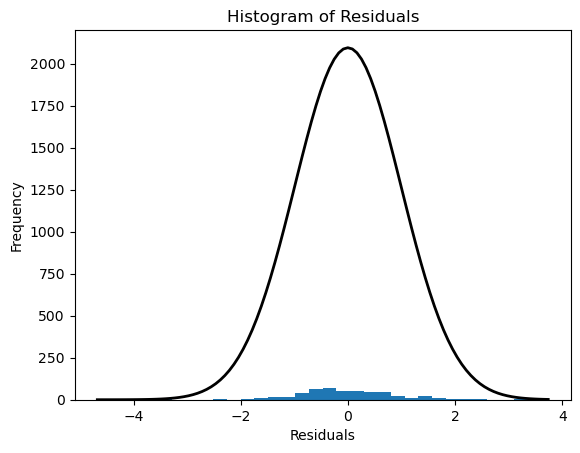

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 2.800193764083809, 'p-value': 0.09425291579787617, 'f-value': 2.804517767221727, 'f p-value': 0.0946015160885206}


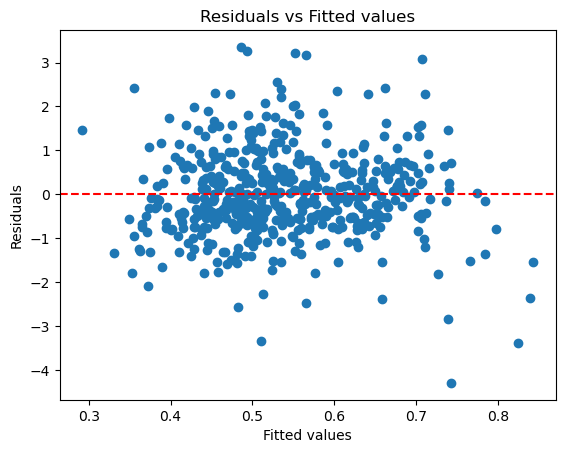

The residuals are homoscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 1.249921332249706, 'p-value': 0.21132828593193986}


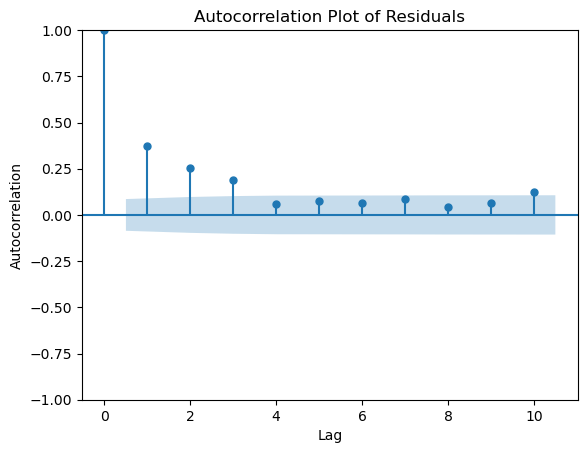

The residuals are not autocorrelated.
The correlation matrix is:


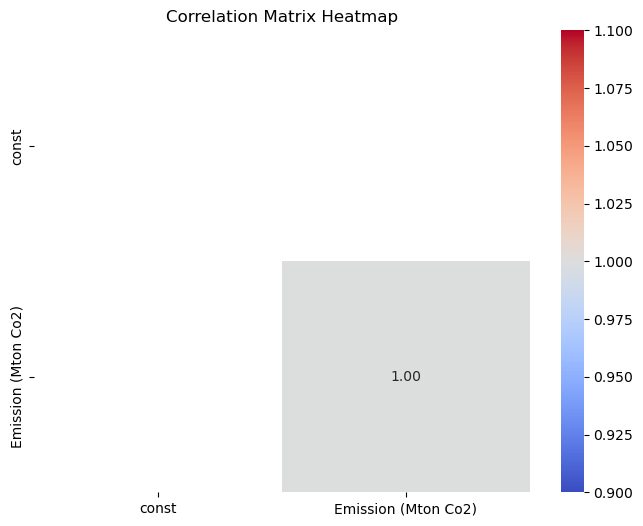

              Variable         VIF
0                const  133.525432
1  Emission (Mton Co2)    1.000000
There is multicollinearity in the model.
                            OLS Regression Results                            
Dep. Variable:                anomaly   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.933
Date:                Thu, 04 Apr 2024   Prob (F-statistic):             0.0268
Time:                        00:04:29   Log-Likelihood:                -735.11
No. Observations:                 521   AIC:                             1474.
Df Residuals:                     519   BIC:                             1483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t| 

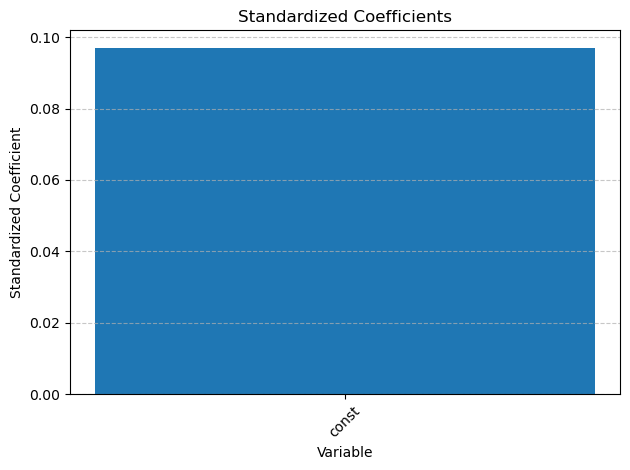

In [69]:
X = petroleum['Emission (Mton Co2)']
y = petroleum['anomaly']
test_linear_model(X, y)

In [70]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic 